关于png文件索引方式的转化读取。

In [1]:
import os
import os.path as osp
import numpy as np
from PIL import Image 
from matplotlib.pyplot import imshow
%matplotlib inline 


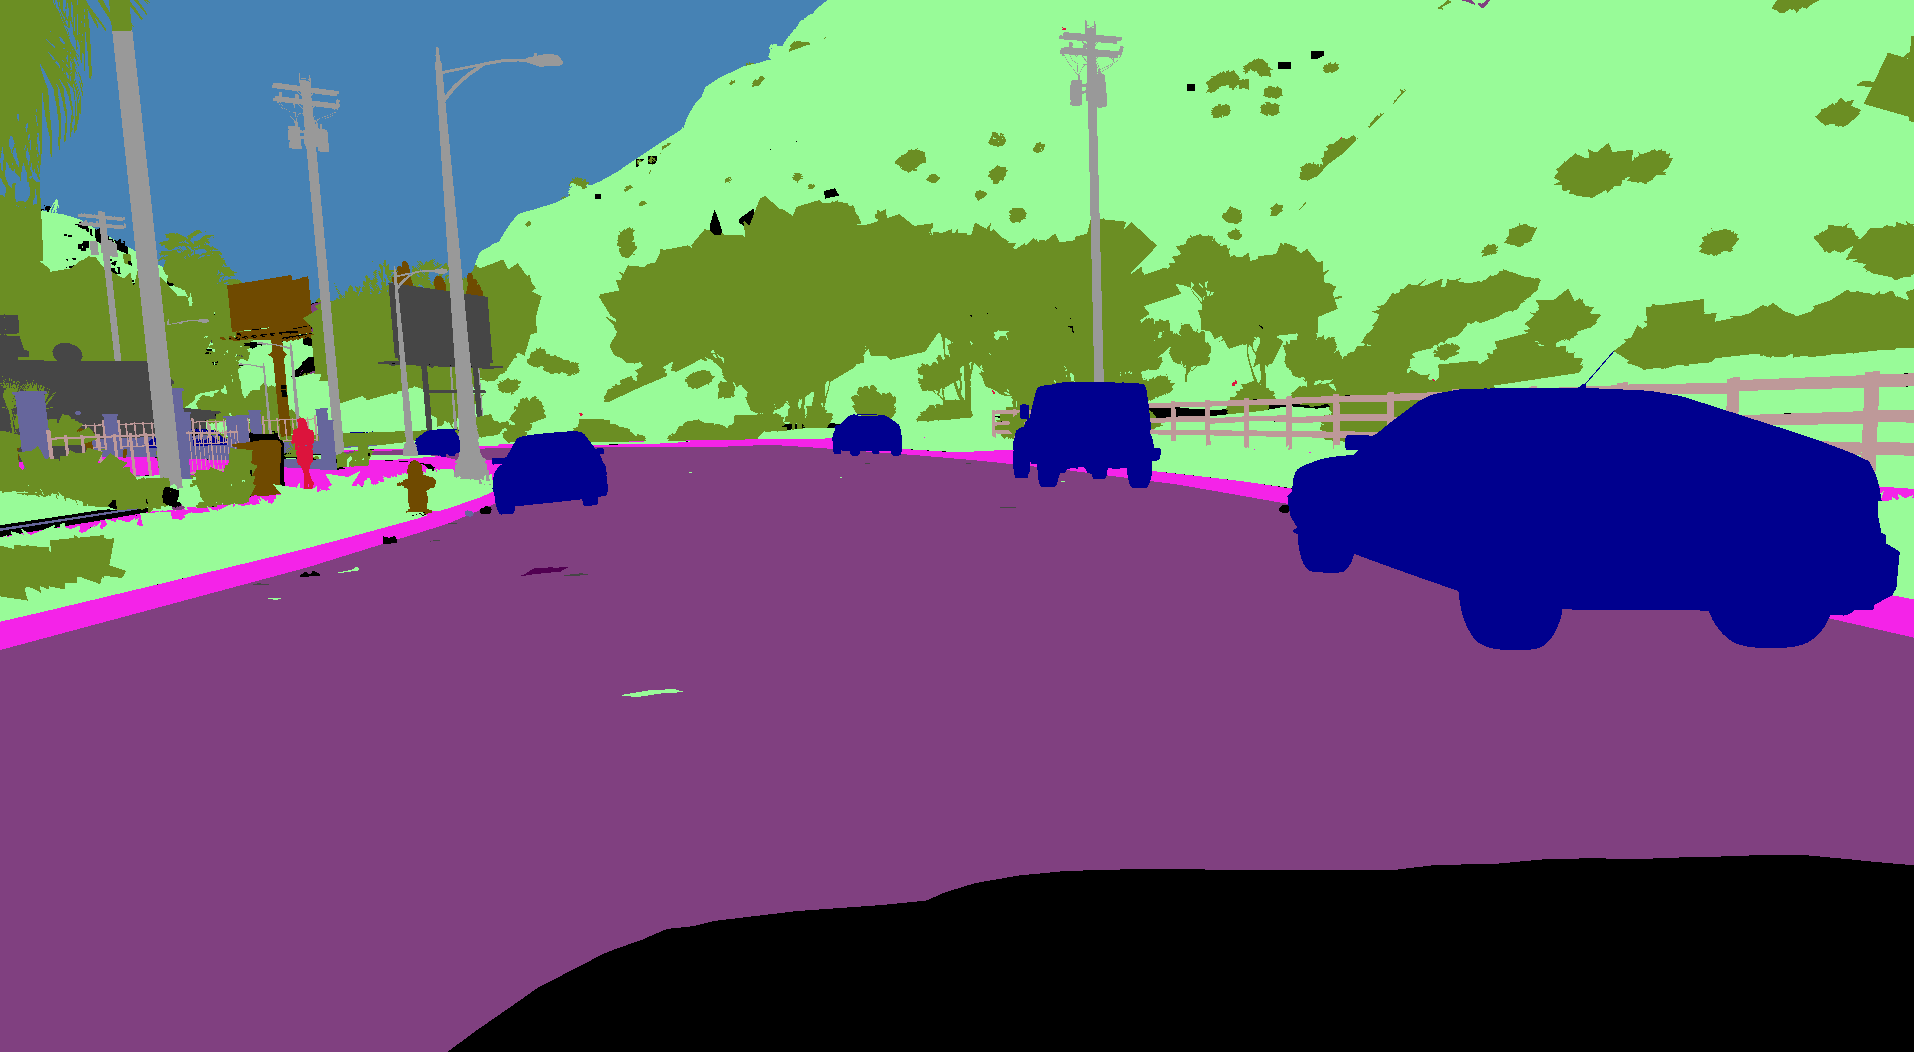

In [2]:
filename='00138.png'
img = Image.open(filename)
img

# imshow(indexed)

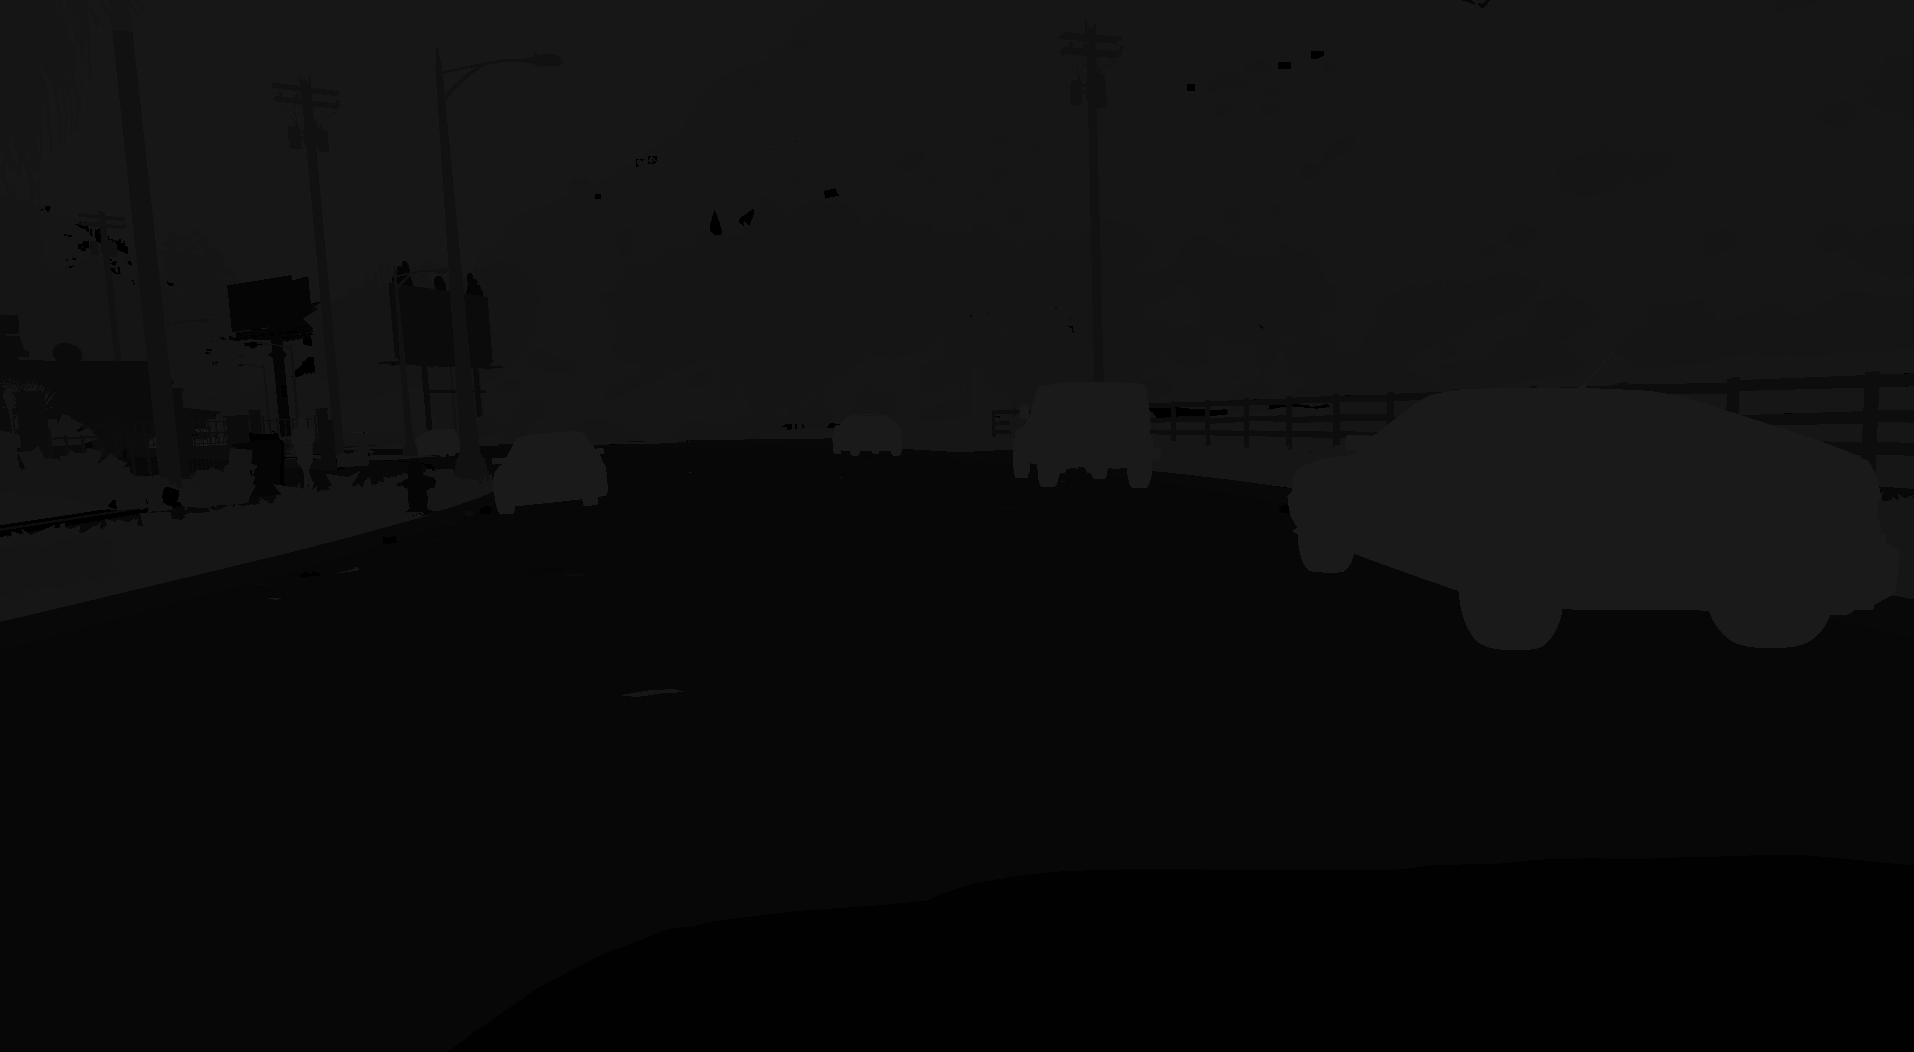

In [3]:
indexed = np.array(img, dtype=np.uint8)
# print(indexed.shape)
Image.fromarray(indexed)

In [4]:
indexed = np.array(img, dtype=np.uint8)
# Get the colour palette
palette = img.getpalette()

# Determine the total number of colours
num_colours = len(palette)//3

# Determine maximum value of the image data type
max_val = float(np.iinfo(indexed.dtype).max)

# Create a colour map matrix
map = np.array(palette).reshape(num_colours, 3) / max_val

In [5]:
palette = np.array(palette).reshape(num_colours, 3)

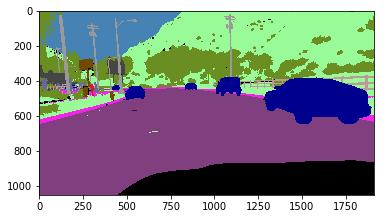

In [8]:
shape = (indexed.shape[0], indexed.shape[1],3)
out_img = np.zeros(shape)
for i in range(35):
    mask = indexed == i
    out_img[mask] = map[i,:]
imshow(out_img)

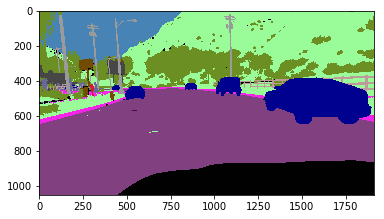

In [6]:
shape = (indexed.shape[0], indexed.shape[1],3)
out_img = np.zeros(shape)
for i in range(35):
    mask = indexed == i
    out_img[mask] = 255 - palette[i,:]
imshow(out_img)

In [7]:
def indexed2RGB(indexed, palette):
    shape = (indexed.shape[0], indexed.shape[1],3)
    rgb_img = np.zeros(shape)
    for i in range(len(palette)):
        mask = indexed == i
        out_img[mask] = 255 - palette[i,:]
    return rgb_img